In [1]:
import numpy as np

In [2]:
def Kernel_rbf(X1,X2,l = 1.0,sigma_f = 1.0):
    distance = np.sum(X1**2,1).reshape(-1,1)+np.sum(X2**2,1)-2*np.dot(X1,X2.T)
    return (sigma_f**2)*np.exp((-0.5*distance)/l**2)

In [8]:
import matplotlib.pyplot as plt

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    print(mu,(uncertainty))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] [1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96
 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96
 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96
 1.96 1.96 1.96 1.96 1.96 1.96 1.96 1.96]


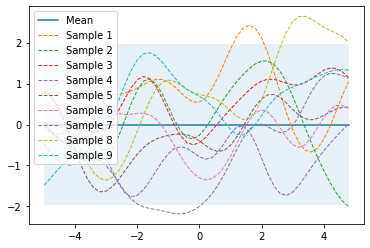

In [9]:
X = np.arange(-5,5,0.2).reshape(-1,1)

mu = np.zeros(X.shape)
cov = Kernel_rbf(X,X)

samples = np.random.multivariate_normal(mu.ravel(), cov, 9)
plot_gp(mu, cov, X, samples=samples)

In [10]:
# noise_free data

from numpy.linalg import inv

def posterior_predictive(X_inputs,X_train,Y_train,l = 1.0,sigma_f = 1.0,sigma_y = 1e-8):
    A = Kernel_rbf(X_train,X_train,l,sigma_f)+sigma_y**2*np.eye(len(X_train))
    K_ = Kernel_rbf(X_train,X_inputs,1,sigma_f)
    K__ = Kernel_rbf(X_inputs,X_inputs,l,sigma_f)+1e-9*np.eye(len(X_inputs))
    A_inv = inv(A)
    
    mu_input = K_.T.dot((A_inv)).dot(Y_train)
    cov_input = K__.T - K_.T.dot(A_inv).dot(K_)
    
    return mu_input,cov_input

[ 0.60837747  0.70738556  0.78331319  0.82314852  0.81631885  0.7568025
  0.64453031  0.48567568  0.29171972  0.07751932 -0.14112001 -0.34975069
 -0.53693679 -0.69496313 -0.81961399 -0.90929743 -0.96392876 -0.9839725
 -0.96990451 -0.92216185 -0.84147098 -0.72934184 -0.58850573 -0.42314433
 -0.23886311 -0.04245957  0.15841119  0.35557606  0.54064079  0.7052631
  0.84147098  0.94210358  1.00140872  1.01574754  0.98426199  0.90929743
  0.7963763   0.65360834  0.49058161  0.3169571   0.14112001 -0.03073725
 -0.19483517 -0.34928058 -0.49299356 -0.62448117 -0.74091403 -0.83786438
 -0.90983838 -0.95145836] [1.39902184e+00 1.14671922e+00 8.53352192e-01 5.42521172e-01
 2.46436291e-01 6.19806447e-05 1.67193720e-01 2.38862713e-01
 2.17539087e-01 1.25465652e-01 6.19806481e-05 1.15654592e-01
 1.83954251e-01 1.83395304e-01 1.14575966e-01 6.19806309e-05
 1.22383080e-01 2.09968794e-01 2.27417006e-01 1.56304963e-01
 6.19806241e-05 2.17200784e-01 4.55968202e-01 6.70986423e-01
 8.20798428e-01 8.76330154e

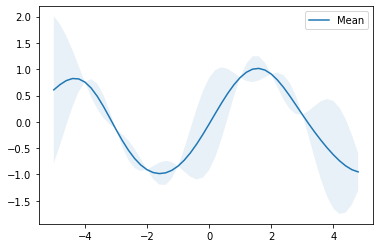

In [12]:
X_train = np.array([-4, -3, -2, -1, 1, 2, 3, 5]).reshape(-1, 1)
Y_train = np.sin(X_train)

mu_s, cov_s = posterior_predictive(X, X_train, Y_train)
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 0)
plot_gp(mu_s, cov_s, X)

In [7]:
# http://krasserm.github.io/2018/03/19/gaussian-processes/
# https://github.com/krasserm/bayesian-machine-learning/blob/dev/gaussian-processes/gaussian_processes_util.py#L7

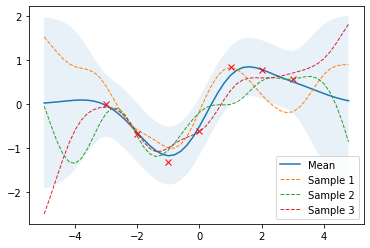

In [8]:
noise = 0.4

# Noisy training data
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=noise)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

C:\Users\Jayanth\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\Jayanth\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


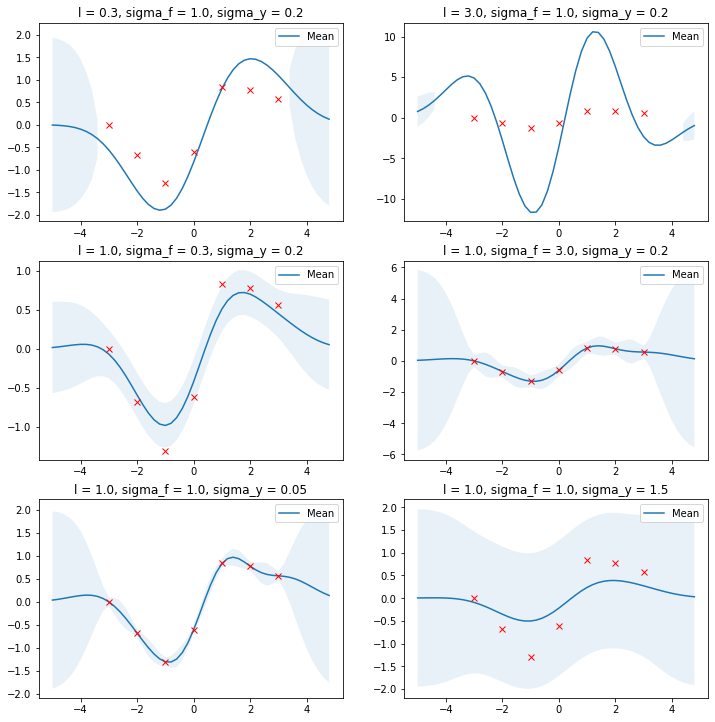

In [9]:
import matplotlib.pyplot as plt

params = [
    (0.3, 1.0, 0.2),
    (3.0, 1.0, 0.2),
    (1.0, 0.3, 0.2),
    (1.0, 3.0, 0.2),
    (1.0, 1.0, 0.05),
    (1.0, 1.0, 1.5),
]

plt.figure(figsize=(12, 5))

for i, (l, sigma_f, sigma_y) in enumerate(params):
    mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l, 
                                       sigma_f=sigma_f, 
                                       sigma_y=sigma_y)
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'l = {l}, sigma_f = {sigma_f}, sigma_y = {sigma_y}')
    plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

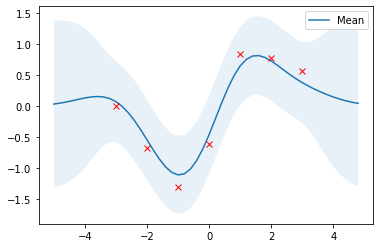

In [10]:
from numpy.linalg import cholesky, det, lstsq
from scipy.optimize import minimize

def nll_fn(X_train, Y_train, noise, naive=True):
    """
    Returns a function that computes the negative log marginal
    likelihood for training data X_train and Y_train and given
    noise level.

    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).
        noise: known noise level of Y_train.
        naive: if True use a naive implementation of Eq. (7), if
               False use a numerically more stable implementation.

    Returns:
        Minimization objective.
    """
    
    Y_train = Y_train.ravel()
    
    def nll_naive(theta):
        # Naive implementation of Eq. (7). Works well for the examples 
        # in this article but is numerically less stable compared to 
        # the implementation in nll_stable below.
        K = Kernel_rbf(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        return 0.5 * np.log(det(K)) + \
               0.5 * Y_train.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)
        
    def nll_stable(theta):
        # Numerically more stable implementation of Eq. (7) as described
        # in http://www.gaussianprocess.org/gpml/chapters/RW2.pdf, Section
        # 2.2, Algorithm 2.1.
        
        def ls(a, b):
            return lstsq(a, b, rcond=-1)[0]
        
        K = Kernel_rbf(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        L = cholesky(K)
        return np.sum(np.log(np.diagonal(L))) + \
               0.5 * Y_train.dot(ls(L.T, ls(L, Y_train))) + \
               0.5 * len(X_train) * np.log(2*np.pi)

    if naive:
        return nll_naive
    else:
        return nll_stable

# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f.
# We should actually run the minimization several times with different
# initializations to avoid local minima but this is skipped here for
# simplicity.
res = minimize(nll_fn(X_train, Y_train, noise), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

# Store the optimization results in global variables so that we can
# compare it later with the results from other implementations.
l_opt, sigma_f_opt = res.x
l_opt, sigma_f_opt

# Compute the prosterior predictive statistics with optimized kernel parameters and plot the results
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=noise)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)